<a href="https://colab.research.google.com/github/A2K2005/Assignments_TSS/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Advance Python Assignments
---




**Part I: Process Automation**





1.   Create a file that contains 1000 lines of random strings.



In [ ]:
import random
import string

with open("random_strings.txt", "w") as file:
    for _ in range(1000):
        random_string = ''.join(random.choice(string.ascii_letters) for _ in range(10))
        file.write(random_string + "\n")



2.   Create a file that contains multiple lines of random strings and file size must be 5 MB.



In [ ]:
import random
import string

file_size = 5 * 1024 * 1024  
line_size = 100 

with open("random_strings_large.txt", "w") as file:
    while file.tell() < file_size:
        random_string = ''.join(random.choice(string.ascii_letters) for _ in range(line_size - 1))
        file.write(random_string + "\n")



3.   Create 10 files that contains multiple lines of random strings and file size of each file must be 5 MB.



In [ ]:
import random
import string

file_size = 5 * 1024 * 1024 
line_size = 100  

for i in range(1, 11):
    with open(f"random_strings_{i}.txt", "w") as file:
        while file.tell() < file_size:
            random_string = ''.join(random.choice(string.ascii_letters) for _ in range(line_size - 1))
            file.write(random_string + "\n")




4.   Create 5 files of size 1GB, 2GB, 3GB, 4GB and 5GB; file contains multiple lines of random strings.



In [ ]:
import random
import string

file_sizes = [1, 2, 3, 4, 5]
line_size = 100  

for size in file_sizes:
    file_size = size * 1024 * 1024 * 1024 
    with open(f"random_strings_{size}GB.txt", "w") as file:
        while file.tell() < file_size:
            random_string = ''.join(random.choice(string.ascii_letters) for _ in range(line_size - 1))
            file.write(random_string + "\n")

5.  Convert all the files of Q4 into upper case one by one.

In [ ]:
import os

for size in file_sizes:
    filename = f"random_strings_{size}GB.txt"
    with open(filename, "r") as file:
        content = file.read().upper()
    with open(filename, "w") as file:
        file.write(content)

6.  Convert all the files of Q4 into upper case parallel using multi-threading.

In [ ]:
import os
import threading

file_sizes = [1, 2, 3, 4, 5] 
line_size = 100 

def convert_to_uppercase(filename):
    with open(filename, "r") as file:
        content = file.read().upper()
    with open(filename, "w") as file:
        file.write(content)

threads = []

for size in file_sizes:
    filename = f"random_strings_{size}GB.txt"
    thread = threading.Thread(target=convert_to_uppercase, args=(filename,))
    thread.start()
    threads.append(thread)

for thread in threads:
    thread.join()

7.  WAP to automatically download 10 images of cat from “Google Images”. [Hint: Find the package from 
pypi.org and use it]

In [ ]:
from google_images_download import google_images_download

def download_images(keyword, limit):
    response = google_images_download.googleimagesdownload()
    arguments = {
        "keywords": keyword,
        "limit": limit,
        "print_urls": True
    }
    paths = response.download(arguments)
    return paths[0][keyword]

keyword = "cat" 
limit = 10 

image_paths = download_images(keyword, limit)
print("Downloaded images:")
for path in image_paths:
    print(path)


8.  WAP to automatically download 10 videos of “Machine Learning” from “Youtube.com”. [Hint: Find the 
package from pypi.org and use it]

In [ ]:
from pytube import YouTube

def download_videos(keyword, limit):
    query = keyword + " video"
    search_results = YouTube.search(query, limit=limit)
    video_urls = [result['url'] for result in search_results]
    
    for url in video_urls:
        try:
            video = YouTube(url)
            video.streams.get_highest_resolution().download()
            print("Downloaded:", video.title)
        except Exception as e:
            print("Error occurred while downloading:", e)

keyword = "Machine Learning"  
limit = 10 

download_videos(keyword, limit)

9.  Convert all the videos of Q8 and convert it to audio. 

[Hint: Find the package from pypi.org and use it]

In [ ]:
from moviepy.editor import VideoFileClip

def convert_videos_to_audio(video_files):
    for file in video_files:
        try:
            video = VideoFileClip(file)
            audio = video.audio
            audio_file = file.replace(".mp4", ".mp3")
            audio.write_audiofile(audio_file)
            print("Converted to audio:", audio_file)
        except Exception as e:
            print("Error occurred while converting to audio:", e)

video_files = ["video1.mp4", "video2.mp4", "video3.mp4"]

convert_videos_to_audio(video_files)

10.  Create an automated pipeline using multi-threading for:

“Automatic Download of 100 Videos from YouTube” → “Convert it to Audio”.

11.  Create an automated pipeline using multi-threading for: 

“Automatic Download of 500 images of Dog from 
GoogleImages” → “Rescale it to 50%”.



---

**Part II: Data Analytics**







12.  Create a random dataset of 100 rows and 30 columns. All the values are defined between [1,200].  Perform 
the following operations:


In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)

dataset = np.random.randint(1, 201, size=(100, 30))
df = pd.DataFrame(dataset)
df


*   Replace all the values with NA in the dataset defined between [10, 
60]. Print the count of number 
rows having missing values.


In [ ]:
correlation = df.corr()
sns.heatmap(correlation, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Pearson Correlation Heat Map")
plt.show()


*   Replace all the NA values with the average of the column value. 


In [ ]:
df = df.fillna(df.mean())

*   Find the Pearson correlation among all the columns and plot heat map. Also select those columns 
having correlation <=0.7.


In [ ]:
correlation = df.corr()
sns.heatmap(correlation, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Pearson Correlation Heat Map")
plt.show()

selected_columns = correlation.columns[(correlation <= 0.7).any()]
print("Columns with correlation <= 0.7:", selected_columns)
     


*   Normalize all the values in the dataset between 0 and 10.


In [ ]:
df_normalized = (df - df.min()) / (df.max() - df.min()) * 10


*   Replace all the values in the dataset with 1 if value <=0.5 else with 0.

In [ ]:
df_binary = df_normalized.applymap(lambda x: 1 if x <= 0.5 else 0)

13. Create a random dataset of 500 rows and 10 columns. 

Columns 1 to 4 are defined between [-10, 10]; 

Columns 5 to 8 are defined between [10, 20]; 

Columns 9 to 10 are defined between [-100, 100]. 

Apply following clustering algorithms; determine the optimal number of clusters and plot distance metric 
graph using each algorithm.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage

np.random.seed(42)

columns = {
    'Column1': np.random.uniform(-10, 10, size=500),
    'Column2': np.random.uniform(-10, 10, size=500),
    'Column3': np.random.uniform(-10, 10, size=500),
    'Column4': np.random.uniform(-10, 10, size=500),
    'Column5': np.random.uniform(10, 20, size=500),
    'Column6': np.random.uniform(10, 20, size=500),
    'Column7': np.random.uniform(10, 20, size=500),
    'Column8': np.random.uniform(10, 20, size=500),
    'Column9': np.random.uniform(-100, 100, size=500),
    'Column10': np.random.uniform(-100, 100, size=500)
}

df = pd.DataFrame(columns)

*   K-Mean clustering


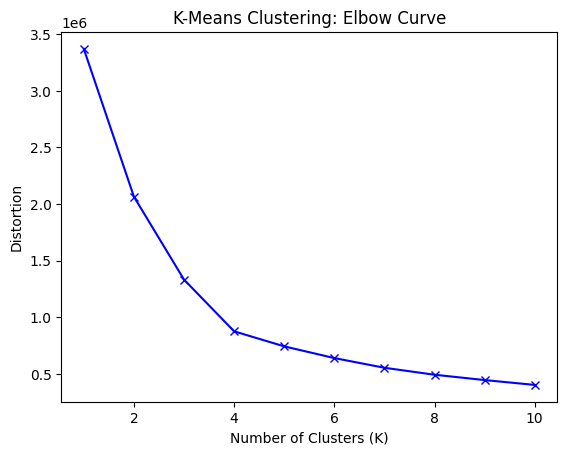

In [3]:
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k,n_init=10)
    kmeans.fit(df)
    distortions.append(kmeans.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.title('K-Means Clustering: Elbow Curve')
plt.show()

*   Hierarchical clustering

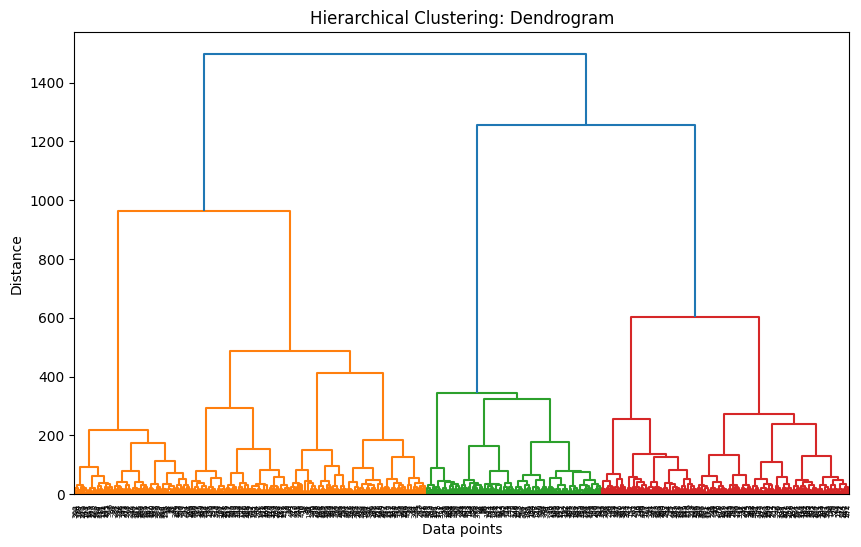

In [4]:
k = 6
kmeans = KMeans(n_clusters=k, n_init=10)
kmeans.fit(df)
labels_kmeans = kmeans.labels_

linkage_matrix = linkage(df, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering: Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

14.   Create a random dataset of 600 rows and 15 columns. All the values are defined between [-100,100]. 
Perform the following operations:


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(50)

data = np.random.uniform(-100,100,size = (600,15))
columns = [f'Column{i}' for i in range (1,16)]
df = pd.DataFrame(data,columns=columns)
df

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15
0,-1.079671,-54.383379,-48.905215,-20.734018,-24.536980,99.314846,-18.360560,54.378799,52.107338,-37.998130,-30.691759,-29.647037,-70.906629,94.532937,81.835688
1,11.991421,-37.281851,77.640008,34.914613,-21.782510,1.436825,4.820701,85.600186,14.274614,33.667514,-89.548262,-34.588539,-88.719672,-64.034461,85.186635
2,87.603045,42.818541,46.537522,-7.650465,86.265854,-18.715951,36.641154,29.983174,19.753036,-55.592122,36.471434,75.611261,59.343453,-13.599550,83.575644
3,56.366736,45.150056,-75.029061,83.261690,-22.457801,-41.014091,23.346283,-6.430754,-48.932217,67.799178,-64.276160,-54.577166,31.975289,-4.176751,-85.310532
4,-72.207986,-77.538563,-4.443007,8.059246,91.614210,16.758462,5.332818,84.452538,83.851403,-49.598227,36.526522,92.855224,-54.607671,43.203440,59.552021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,25.475167,24.014853,1.770120,82.119847,82.620159,-23.391647,-5.345685,-85.061384,58.622861,-84.035868,-90.296766,-62.887812,87.425046,87.722261,63.082482
596,10.081012,31.484666,30.732713,-20.743466,20.273915,83.356998,-47.465411,93.260002,85.845003,-42.851275,76.686590,-31.596931,-49.193286,-49.056143,-90.501485
597,90.864653,95.133394,3.449607,50.240118,-65.885894,13.504560,58.660746,-98.299485,82.828532,80.222074,6.144930,-59.517124,-64.073006,-81.536651,20.957805
598,-52.264721,61.460185,27.876079,10.705229,-40.076541,0.602016,50.950859,-51.366108,14.212293,82.061178,81.178746,-54.029524,55.215963,-44.396618,-44.358833


*   Plot scatter graph between Column 5 and Column 6.


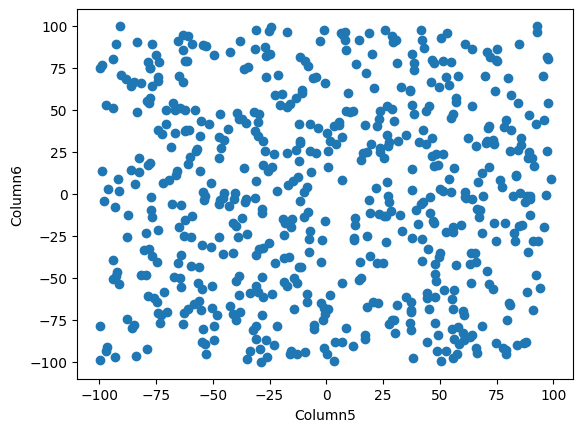

In [6]:
plt.scatter(df['Column5'],df['Column6'])
plt.xlabel('Column5')
plt.ylabel('Column6')
plt.show()

*   Plot histogram of each column in single graph.


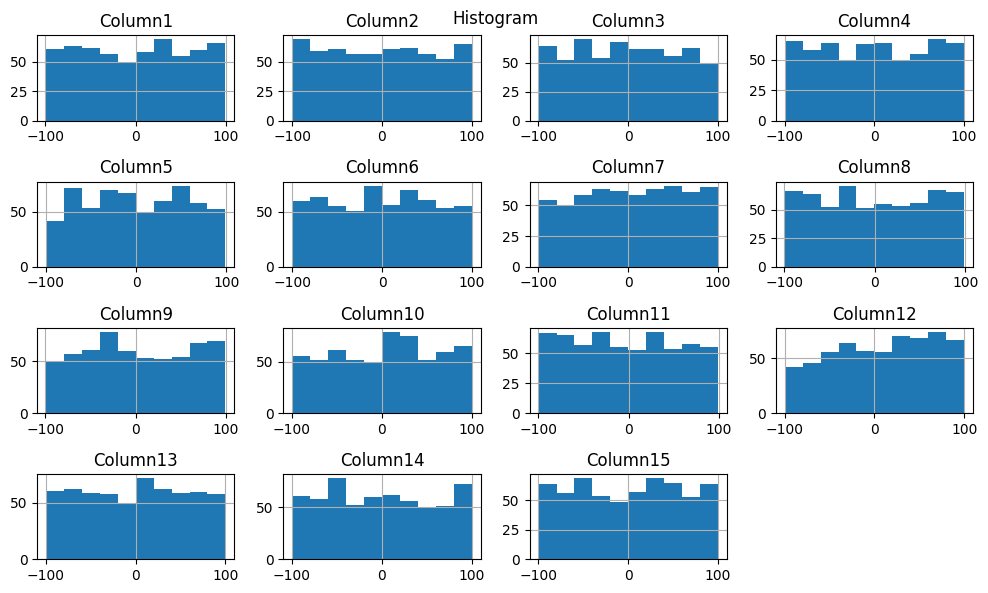

In [8]:
df.hist(figsize=(10,6))
plt.tight_layout()
plt.suptitle('Histogram')
plt.show()

*   Plot the Box plot of each column in single graph.

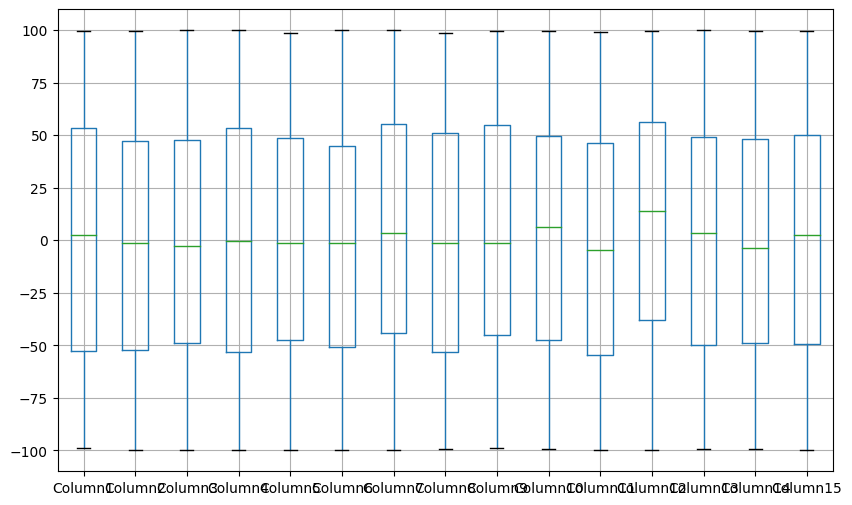

In [9]:
df.boxplot(figsize=(10,6))
plt.show()

15.   Create a random dataset of 500 rows and 5 columns: 
All the values are defined between [5,10]. 
Perform the following operations:



In [10]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp,wilcoxon,ttest_ind,ranksums
np.random.seed(50)

data = np.random.uniform(5,10,size = (500,5))
columns = [f'Column{i}' for i in range (1,6)]
df = pd.DataFrame(data,columns=columns)

*   Perform t-Test on each column.


In [11]:
t_test_results = {}
for column in df.columns:
    t_statistic, p_value = ttest_1samp(df[column], df[column].mean())
    t_test_results[column] = {'t-statistic': t_statistic, 'p-value': p_value}


*   Perform Wilcoxon Signed Rank Test on each column.


In [12]:
wilcoxon_results = {}
for column in df.columns:
    statistic, p_value = wilcoxon(df[column] - df[column].mean())
    wilcoxon_results[column] = {'statistic': statistic, 'p-value': p_value}

*   Perform Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4

In [13]:
ttest_ind_result = ttest_ind(df.iloc[:, 2], df.iloc[:, 3])
ranksums_result = ranksums(df.iloc[:, 2], df.iloc[:, 3])